In [45]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras

from keras.layers import Input, Lambda, Dense, Flatten

from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#https://github.com/ctrl-gaurav/Pneumonia-Detection/blob/main/VGG%2016.ipynb

In [46]:
image_size=[224,224]
train_dir = "/Users/saman/OneDrive/Documents/EFREI/Datacamp/chest_xray/train"
test_dir="/Users/saman/OneDrive/Documents/EFREI/Datacamp/chest_xray/test"

In [47]:
vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [48]:
for layer in vgg.layers:
    layer.trainable = False

In [49]:
folders = glob('/Users/saman/OneDrive/Documents/EFREI/Datacamp/chest_xray/train/*')
x = Flatten()(vgg.output)

In [50]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Users/saman/OneDrive/Documents/EFREI/Datacamp/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/Users/saman/OneDrive/Documents/EFREI/Datacamp/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [117]:
r.history

{'loss': [0.22620749473571777, 0.17115826904773712],
 'accuracy': [0.9246941804885864, 0.9459097981452942],
 'val_loss': [0.24689170718193054, 0.30510619282722473],
 'val_accuracy': [0.9214743375778198, 0.9198718070983887]}

In [37]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [17]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_set, batch_size=16)
print("test loss, test acc:", results)

Evaluate on test data
63/63 [==============================] - 127s 2s/step - loss: 0.2314 - accuracy: 0.9279
test loss, test acc: [0.23144841194152832, 0.9278846383094788]


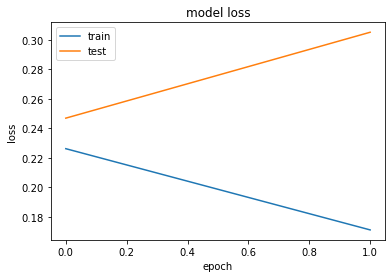

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

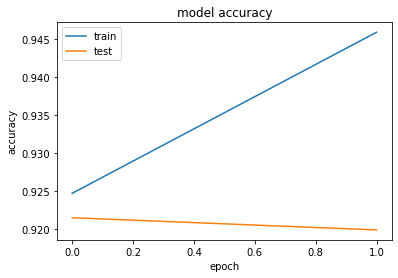

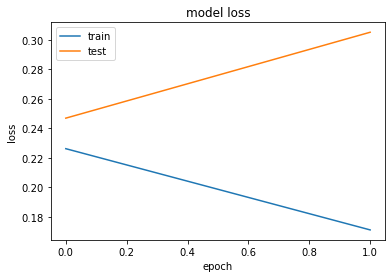

In [121]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
model=load_model('chest_xray.h5')

In [57]:
#test our model
image=load_img(r"C:\Users\saman\OneDrive\Documents\EFREI\Datacamp\chest_xray\test\NORMAL\NORMAL-217318-0001.jpeg",target_size=(224,224))

In [58]:
x=img_to_array(image)

In [59]:
x=np.expand_dims(x, axis=0)

In [60]:
image_data=preprocess_input(x)

In [61]:
classes=model.predict(image_data)
print(classes)

1/1 [==============================] - 0s 390ms/step
[[1.0000000e+00 7.3828367e-28]]


In [62]:
print(classes[0])

[1.0000000e+00 7.3828367e-28]


In [63]:
result=int(classes[0][0])

In [64]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal
